# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

In [3]:

print(weather_api_key)

98e0dc7f249b35bf6610a1fbb8fe3aba


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Set empty lists to hold
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
proc_num = 0
set_num = 1
# Loop through each character
for city in cities:
    
    # Create search query, make request and store in json
    units = "imperial"
    query = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query + city)
    response_json = response.json()
    
    # Try to grab the height and mass of characters if they are available in the Star Wars API
    try: 
        city_name.append(response_json['name'])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        latitude.append(response_json["coord"]["lat"])
        longitude.append(response_json["coord"]["lon"])
        max_temperature.append(response_json["main"]["temp_max"])
        humidity.append(response_json["main"]["humidity"])
        cloudiness.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        city_record = response_json["name"]
        
        if proc_num < 49:
            proc_num+=1
        else:
            proc_num = 0
            set_num+=1
       
        print(f"Processing Record {proc_num} of Set {set_num} | {city_record}")
    # Handle exceptions for a character that is not available in the Star Wars API
    except:   
        print("City not found. Skipping...") 
        
        pass

print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

City not found. Skipping...
Processing Record 1 of Set 1 | Ferrol
Processing Record 2 of Set 2 | Kapaa
City not found. Skipping...
Processing Record 3 of Set 3 | Deep River
Processing Record 4 of Set 4 | Ushuaia
Processing Record 5 of Set 5 | Russellville
Processing Record 6 of Set 6 | Nikolskoye
Processing Record 7 of Set 7 | Mar del Plata
Processing Record 8 of Set 8 | Santa Marinella
Processing Record 9 of Set 9 | Rikitea
Processing Record 10 of Set 10 | Puerto Ayora
Processing Record 11 of Set 11 | Yellowknife
Processing Record 12 of Set 12 | Bambous Virieux
Processing Record 13 of Set 13 | Biak
Processing Record 14 of Set 14 | Albany
Processing Record 15 of Set 15 | San Fernando
Processing Record 16 of Set 16 | Kenai
Processing Record 17 of Set 17 | Castro
Processing Record 18 of Set 18 | Inyonga
Processing Record 19 of Set 19 | Cherskiy
Processing Record 20 of Set 20 | Talas
Processing Record 21 of Set 21 | Chubbuck
Processing Record 22 of Set 22 | Pesochnoye
Processing Record 23

Processing Record 182 of Set 35 | Keetmanshoop
Processing Record 183 of Set 36 | Kumul
Processing Record 184 of Set 37 | Cidreira
City not found. Skipping...
Processing Record 185 of Set 38 | Buta
Processing Record 186 of Set 39 | Bredasdorp
Processing Record 187 of Set 40 | Māngrol
Processing Record 188 of Set 41 | Bulawayo
Processing Record 189 of Set 42 | Cervo
Processing Record 190 of Set 43 | Hobart
Processing Record 191 of Set 44 | Fernley
City not found. Skipping...
Processing Record 192 of Set 45 | Sept-Îles
Processing Record 193 of Set 46 | Agadez
Processing Record 194 of Set 47 | Jalu
Processing Record 195 of Set 48 | Susaki
Processing Record 196 of Set 0 | Rocha
Processing Record 197 of Set 1 | Pemangkat
Processing Record 198 of Set 2 | Parīchhatgarh
Processing Record 199 of Set 3 | Galatista
Processing Record 200 of Set 4 | Havre-St-Pierre
Processing Record 201 of Set 5 | Guayaramerín
City not found. Skipping...
Processing Record 202 of Set 6 | Salamiyah
Processing Record 2

Processing Record 360 of Set 17 | Gondanglegi
Processing Record 361 of Set 18 | Kamenka
Processing Record 362 of Set 19 | Petropavlovsk-Kamchatskiy
City not found. Skipping...
Processing Record 363 of Set 20 | Kaoma
City not found. Skipping...
Processing Record 364 of Set 21 | Sirte
Processing Record 365 of Set 22 | Emporia
Processing Record 366 of Set 23 | Nizhniy Baskunchak
Processing Record 367 of Set 24 | Valparaíso
Processing Record 368 of Set 25 | Prymors'k
Processing Record 369 of Set 26 | Gladstone
Processing Record 370 of Set 27 | Banjar
Processing Record 371 of Set 28 | Krasnosel'kup
Processing Record 372 of Set 29 | Itamarandiba
Processing Record 373 of Set 30 | Adrar
Processing Record 374 of Set 31 | Wagar
Processing Record 375 of Set 32 | Belmonte
Processing Record 376 of Set 33 | Grand Gaube
Processing Record 377 of Set 34 | Aktau
Processing Record 378 of Set 35 | Iringa
Processing Record 379 of Set 36 | Bratsk
Processing Record 380 of Set 37 | Gorūr
Processing Record 381

Processing Record 542 of Set 3 | Madimba
Processing Record 543 of Set 4 | Port Augusta
Processing Record 544 of Set 5 | Alberton
Processing Record 545 of Set 6 | Bac Lieu
City not found. Skipping...
Processing Record 546 of Set 7 | Saldanha
Processing Record 547 of Set 8 | Mulegé
Processing Record 548 of Set 9 | Tual
Processing Record 549 of Set 10 | Yuanping
Processing Record 550 of Set 11 | Paracuru
Processing Record 551 of Set 12 | Kuril'sk
Processing Record 552 of Set 13 | Digras
Processing Record 553 of Set 14 | Acaraú
Processing Record 554 of Set 15 | Kuminskiy
Processing Record 555 of Set 16 | Atasū
Processing Record 556 of Set 17 | Juba
Processing Record 557 of Set 18 | Vangaindrano
Processing Record 558 of Set 19 | Santa Maria
Processing Record 559 of Set 20 | Mankono
Processing Record 560 of Set 21 | Lunca de Jos
Processing Record 561 of Set 22 | Jinchang
Processing Record 562 of Set 23 | Rotifunk
Processing Record 563 of Set 24 | Lagunas
Processing Record 564 of Set 25 | Gor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dictionary = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dictionary)

# Display DataFrame
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ferrol,ES,1666053704,43.4832,-8.2369,65.34,79,100,5.59
1,Kapaa,US,1666053704,22.0752,-159.3190,84.18,69,0,9.22
2,Deep River,CA,1666053705,46.1001,-77.4995,46.15,98,35,5.19
3,Ushuaia,AR,1666053488,-54.8000,-68.3000,44.26,81,100,12.66
4,Russellville,US,1666053687,35.2784,-93.1338,57.34,34,0,8.05


In [7]:
weather_data.to_csv("../output_data/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
humid_hundop = weather_data["Humidity"].max()
humid_hundop

100

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

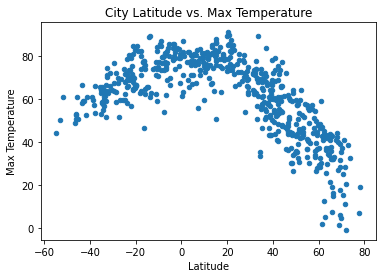

In [11]:
lat_v_temp = weather_data.plot(kind = "scatter", x="Latitude", y="Max Temperature", 
                                      title="City Latitude vs. Max Temperature")
lat_v_temp.get_figure().savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

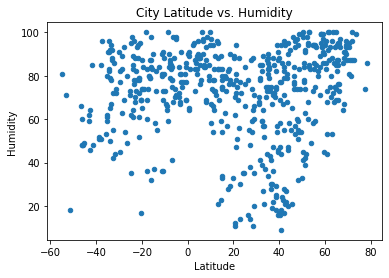

In [12]:
lat_v_Hum = weather_data.plot(kind = "scatter", x="Latitude", y="Humidity", 
                                      title="City Latitude vs. Humidity")
lat_v_Hum.get_figure().savefig("../output_data/Fig2.png")

## Latitude vs. Cloudiness Plot

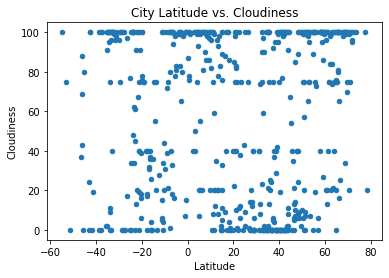

In [13]:
lat_v_cloud = weather_data.plot(kind = "scatter", x="Latitude", y="Cloudiness", 
                                      title="City Latitude vs. Cloudiness")
lat_v_cloud.get_figure().savefig("../output_data/Fig3.png")

## Latitude vs. Wind Speed Plot

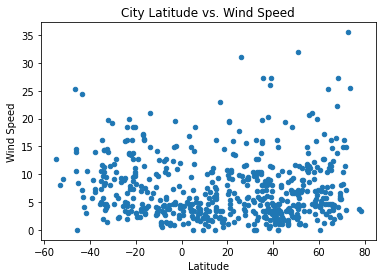

In [14]:
lat_v_wind = weather_data.plot(kind = "scatter", x="Latitude", y="Wind Speed", 
                                      title="City Latitude vs. Wind Speed")
lat_v_wind.get_figure().savefig("../output_data/Fig4.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7002414572150769


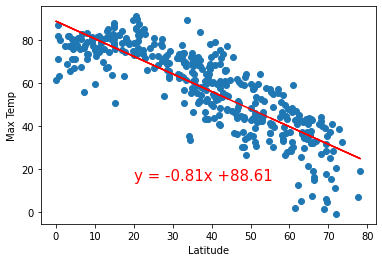

In [15]:
n_lat = weather_data.loc[weather_data["Latitude"] >= 0]
s_lat = weather_data.loc[weather_data["Latitude"] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat["Latitude"],n_lat["Max Temperature"])
regress_values = (n_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(n_lat["Latitude"],n_lat["Max Temperature"])
plt.plot(n_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5036759450694852


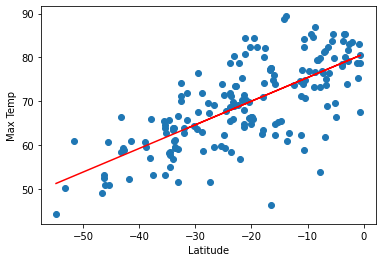

In [16]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat["Latitude"],s_lat["Max Temperature"])
regress_values = (s_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(s_lat["Latitude"],s_lat["Max Temperature"])
plt.plot(s_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.016334205354418548


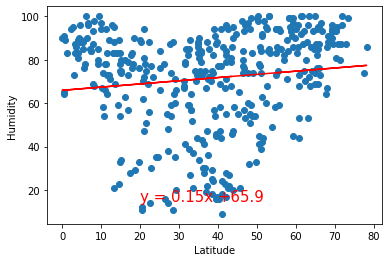

In [17]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat["Latitude"],n_lat["Humidity"])
regress_values = (n_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(n_lat["Latitude"],n_lat["Humidity"])
plt.plot(n_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05961003812733228


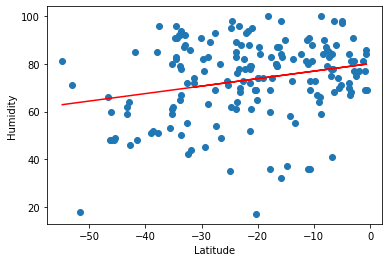

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat["Latitude"],s_lat["Humidity"])
regress_values = (s_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(s_lat["Latitude"],s_lat["Humidity"])
plt.plot(s_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.015690628788289782


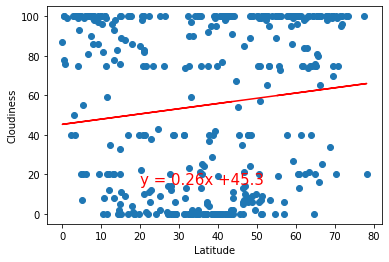

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat["Latitude"],n_lat["Cloudiness"])
regress_values = (n_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(n_lat["Latitude"],n_lat["Cloudiness"])
plt.plot(n_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0015680234635622363


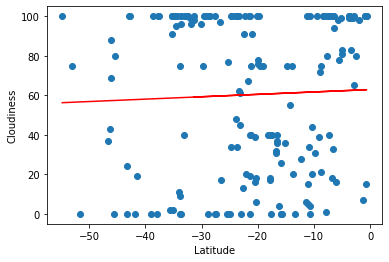

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat["Latitude"],s_lat["Cloudiness"])
regress_values = (s_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(s_lat["Latitude"],s_lat["Cloudiness"])
plt.plot(s_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.030253315707303344


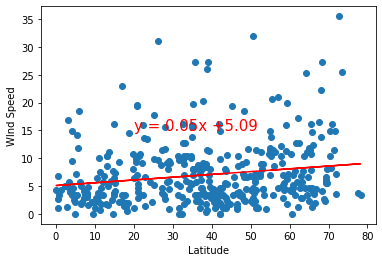

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat["Latitude"],n_lat["Wind Speed"])
regress_values = (n_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(n_lat["Latitude"],n_lat["Wind Speed"])
plt.plot(n_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('WInd Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.053939911581547643


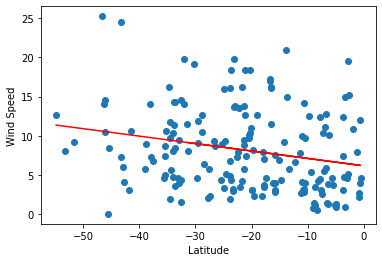

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat["Latitude"],s_lat["Wind Speed"])
regress_values = (s_lat["Latitude"]) * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(s_lat["Latitude"],s_lat["Wind Speed"])
plt.plot(s_lat["Latitude"],regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()